In [1]:
import sqlite3
import pandas as pd

In [2]:
db = sqlite3.connect("IMDB.sqlite")

In [3]:
cur = db.cursor()

# Finding the number of movies in each genre

Using SQL commands

In [4]:
cur.execute("select genre,count(*) from genre group by genre")
ans = cur.fetchall()

In [5]:
ans

[('', 41),
 ('Action', 33),
 ('Adventure', 43),
 ('Animation', 13),
 ('Biography', 21),
 ('Comedy', 31),
 ('Crime', 11),
 ('Drama', 77),
 ('Family', 3),
 ('Fantasy', 7),
 ('History', 6),
 ('Horror', 2),
 ('Music', 3),
 ('Musical', 1),
 ('Mystery', 7),
 ('Romance', 13),
 ('Sci-Fi', 18),
 ('Sport', 3),
 ('Thriller', 14),
 ('War', 2),
 ('Western', 2)]

Using dataframe

In [6]:
df = pd.read_sql_query("select * from genre",db)

In [7]:
genre_counts = df['genre'].value_counts()

In [8]:
genre_counts

Drama        77
Adventure    43
             41
Action       33
Comedy       31
Biography    21
Sci-Fi       18
Thriller     14
Romance      13
Animation    13
Crime        11
Mystery       7
Fantasy       7
History       6
Sport         3
Family        3
Music         3
Western       2
War           2
Horror        2
Musical       1
Name: genre, dtype: int64

# Finding the higest grossing movie ever

In [9]:
cur.execute('PRAGMA table_info(imdb)')
for row in cur:
    print(row)
print("*******************************************")
cur.execute('PRAGMA table_info(earning)')
for row in cur:
    print(row)

(0, 'Movie_id', 'Text', 0, None, 0)
(1, 'Title', 'Text', 0, None, 0)
(2, 'Rating', 'DECIMAL', 0, None, 0)
(3, 'TotalVotes', 'INTEGER', 0, None, 0)
(4, 'MetaCritic', 'DECIMAL', 0, None, 0)
(5, 'Budget', 'DOUBLE', 0, None, 0)
(6, 'Runtime', 'Text', 0, None, 0)
(7, 'CVotes10', 'Text', 0, None, 0)
(8, 'CVotes09', 'Text', 0, None, 0)
(9, 'CVotes08', 'Text', 0, None, 0)
(10, 'CVotes07', 'Text', 0, None, 0)
(11, 'CVotes06', 'Text', 0, None, 0)
(12, 'CVotes05', 'Text', 0, None, 0)
(13, 'CVotes04', 'Text', 0, None, 0)
(14, 'CVotes03', 'Text', 0, None, 0)
(15, 'CVotes02', 'Text', 0, None, 0)
(16, 'CVotes01', 'Text', 0, None, 0)
(17, 'CVotesMale', 'Text', 0, None, 0)
(18, 'CVotesFemale', 'Text', 0, None, 0)
(19, 'CVotesU18', 'Text', 0, None, 0)
(20, 'CVotesU18M', 'Text', 0, None, 0)
(21, 'CVotesU18F', 'Text', 0, None, 0)
(22, 'CVotes1829', 'Text', 0, None, 0)
(23, 'CVotes1829M', 'Text', 0, None, 0)
(24, 'CVotes1829F', 'Text', 0, None, 0)
(25, 'CVotes3044', 'Text', 0, None, 0)
(26, 'CVotes3044M', 

In [10]:
print(cur.execute("select max(domestic+worldwide) from earning").fetchall())

[(3004885849.0,)]


In [11]:
answer = cur.execute('''select t1.movie_id,t1.title,t1.rating,t2.worldwide+t2.domestic
                     from imdb t1
                     join earning t2
                     on t1.movie_id = t2.movie_id
                     group by t1.movie_id
                     order by (t2.worldwide+t2.domestic) desc''').fetchall()

In [12]:
answer[0][1]

'Star Wars: The Force Awakens\xa0(2015)'

# Arranging movies by votes

In [13]:
movie_votes = cur.execute("select title,rating,totalvotes from imdb order by totalvotes desc").fetchall()

In [14]:
movie_votes

[('Inception\xa0(2010)', 8.8, 1609713),
 ('The Dark Knight Rises\xa0(2012)', 8.4, 1240780),
 ('Interstellar\xa0(2014)', 8.6, 1075163),
 ('Django Unchained\xa0(2012)', 8.4, 1056822),
 ('The Avengers\xa0(2012)', 8.1, 1056773),
 ('The Wolf of Wall Street\xa0(2013)', 8.2, 881984),
 ('Shutter Island\xa0(2010)', 8.1, 871391),
 ('Guardians of the Galaxy\xa0(2014)', 8.1, 778220),
 ('Star Wars: The Force Awakens\xa0(2015)', 8.1, 676732),
 ('The Hobbit: An Unexpected Journey\xa0(2012)', 7.9, 675678),
 ('Deadpool\xa0(2016)', 8, 652127),
 ('Mad Max: Fury Road\xa0(2015)', 8.1, 649540),
 ('Gone Girl\xa0(2014)', 8.1, 649474),
 ('Gravity\xa0(2013)', 7.8, 630890),
 ('Toy Story 3\xa0(2010)', 8.3, 596385),
 ('Black Swan\xa0(2010)', 8, 587893),
 ('Silver Linings Playbook\xa0(2012)', 7.8, 570344),
 ('The Martian\xa0(2015)', 8, 569347),
 ('X-Men: Days of Future Past\xa0(2014)', 8, 560736),
 ('X-Men: First Class\xa0(2011)', 7.8, 556713),
 ('Captain America: The Winter Soldier\xa0(2014)', 7.8, 552706),
 ('Sky

# Movie with largest Running time

In [15]:
df = pd.read_sql_query('select * from imdb',db)

In [16]:
df.columns

Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')

In [17]:
df 

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,...,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,...,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,...,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7


In [18]:
df = df[['Title','Runtime']]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    117 non-null    object
 1   Runtime  117 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [20]:
(df['Runtime']=='').sum()

21

In [21]:
df['Runtime'].replace('',0,inplace=True)

C:\Users\chira\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
(df['Runtime']=='').sum()

0

In [23]:
def f(s):
    if s==0:
        return 0
    return int(s.split(' ')[0])
df.loc[:,'Runtime'] = df['Runtime'].apply(f)

C:\Users\chira\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    117 non-null    object
 1   Runtime  117 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [25]:
df.sort_values('Runtime',inplace=True)

C:\Users\chira\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [26]:
df

,Title,Runtime
58,Midnight in Paris (2011),0
41,How to Train Your Dragon (2010),0
43,Hunt for the Wilderpeople (2016),0
44,"I, Daniel Blake (2016)",0
30,Flipped (2010),0
...,...,...
11,Boyhood (2014),165
24,Django Unchained (2012),165
47,Interstellar (2014),169
92,The Hobbit: An Unexpected Journey (2012),169


In [27]:
l = len(df)
print(l)
print(df.iloc[0:0],df.iloc[0:1])

117
Empty DataFrame
Columns: [Title, Runtime]
Index: []                        Title  Runtime
58  Midnight in Paris (2011)        0


# Highest profit

In [28]:
cur = db.cursor()


answer = cur.execute('''select imdb.title,earning.worldwide+earning.domestic-imdb.budget as profit
                        from imdb inner join
                        earning on
                        imdb.movie_id = earning.movie_id
                        order by profit
                        limit 1''').fetchall()


In [29]:
answer

[('Flipped\xa0(2010)', -10489576.0)]

# Least Budget movie

In [30]:
cur = db.cursor()


answer = cur.execute('''select imdb.title,imdb.budget as budget,earning.worldwide+earning.domestic-imdb.budget as profit
                        from imdb inner join
                        earning on
                        imdb.movie_id = earning.movie_id
                        order by budget, profit desc
                        limit 1''').fetchall()


In [31]:
print(answer)

[('Short Term 12\xa0(2013)', 1000000.0, 1026200.0)]


# Year wise hiughest grossing

In [32]:
df = pd.read_sql_query('select * from imdb',db)

In [33]:
df.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [34]:
df = df[['Movie_id','Title']]

In [35]:
df.head()

,Movie_id,Title
0,36809,12 Years a Slave (2013)
1,30114,127 Hours (2010)
2,37367,50/50 (2011)
3,49473,About Time (2013)
4,14867,Amour (2012)


In [36]:
def f(s):
    s = s.strip()
    if s=='':
        print("empty")
        return 0
    if len(s)<6 :
        print("less that least")
        return 0
    if s[-1]!=')' or s[-6]!='(':
        print(s)
        return 0
    return int(s[-5:-1:1])
    
    
df['year'] = df['Title'].apply(f)

In [37]:
df.head()

,Movie_id,Title,year
0,36809,12 Years a Slave (2013),2013
1,30114,127 Hours (2010),2010
2,37367,50/50 (2011),2011
3,49473,About Time (2013),2013
4,14867,Amour (2012),2012


In [38]:
df.isnull().sum()

Movie_id    0
Title       0
year        0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_id  117 non-null    object
 1   Title     117 non-null    object
 2   year      117 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [40]:
earnings = pd.read_sql_query('select * from earning',db)
# merged =  df.merge(earnings,on=)
earnings.isnull().sum()

Movie_id     0
Domestic     0
Worldwide    0
dtype: int64

In [41]:
merged =  df.merge(earnings,on='Movie_id')

In [42]:
merged['total'] = merged['Domestic'] + merged['Worldwide']

In [43]:
merged = merged[['Movie_id','year','Title','total']]

In [44]:
merged.head()

,Movie_id,year,Title,total
0,36809,2013,12 Years a Slave (2013),244405195.0
1,30114,2010,127 Hours (2010),79074027.0
2,37367,2011,50/50 (2011),74201975.0
3,49473,2013,About Time (2013),102423370.0
4,14867,2012,Amour (2012),26578984.0


In [52]:
year_best = merged.groupby(['year'])['total'].max()

In [53]:
year_best.head()

year
2010    1.481975e+09
2011    6.585612e+08
2012    2.142171e+09
2013    1.289680e+09
2014    1.106505e+09
Name: total, dtype: float64

In [48]:
type(year_best)

pandas.core.series.Series

In [65]:
final_answer = merged.merge(year_best,left_on='total',right_on=year_best.values)

In [66]:
final_answer

,total,Movie_id,year,Title,total_x,total_y
0,1.106505e+09,11289,2014,Guardians of the Galaxy (2014),1.106505e+09,1.106505e+09
1,6.585612e+08,41592,2011,Rise of the Planet of the Apes (2011),6.585612e+08,6.585612e+08
2,1.588235e+09,44253,2016,Rogue One (2016),1.588235e+09,1.588235e+09
3,3.004886e+09,38626,2015,Star Wars: The Force Awakens (2015),3.004886e+09,3.004886e+09
4,2.142171e+09,10454,2012,The Avengers (2012),2.142171e+09,2.142171e+09
5,1.289680e+09,41963,2013,The Hunger Games: Catching Fire (2013),1.289680e+09,1.289680e+09
6,1.481975e+09,40832,2010,Toy Story 3 (2010),1.481975e+09,1.481975e+09


In [67]:
# final_answer = final_answer.sort_values('year')
final_answer.sort_values('year',inplace=True)

In [68]:
final_answer.reset_index(inplace=True)

In [69]:
final_answer

,index,total,Movie_id,year,Title,total_x,total_y
0,6,1.481975e+09,40832,2010,Toy Story 3 (2010),1.481975e+09,1.481975e+09
1,1,6.585612e+08,41592,2011,Rise of the Planet of the Apes (2011),6.585612e+08,6.585612e+08
2,4,2.142171e+09,10454,2012,The Avengers (2012),2.142171e+09,2.142171e+09
3,5,1.289680e+09,41963,2013,The Hunger Games: Catching Fire (2013),1.289680e+09,1.289680e+09
4,0,1.106505e+09,11289,2014,Guardians of the Galaxy (2014),1.106505e+09,1.106505e+09
5,3,3.004886e+09,38626,2015,Star Wars: The Force Awakens (2015),3.004886e+09,3.004886e+09
6,2,1.588235e+09,44253,2016,Rogue One (2016),1.588235e+09,1.588235e+09


# Genre wise movie percentage budget

In [70]:
movies = pd.read_sql_query('select * from imdb',db)
genres = pd.read_sql_query('select * from genre',db)

In [92]:
genre_budget = movies.merge(genres,on='Movie_id')

In [93]:
genre_budget

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,genre
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Biography
1,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Drama
2,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,History
3,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Adventure
4,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Biography
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7,Adventure
347,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7,Sci-Fi
348,32217,Zootopia (2016),8.1,309474,78,150000000.0,108 min,53626,70912,102352,...,7.8,8.1,7.8,7.8,8.1,7.7,7.6,8.0,8.0,Animation
349,32217,Zootopia (2016),8.1,309474,78,150000000.0,108 min,53626,70912,102352,...,7.8,8.1,7.8,7.8,8.1,7.7,7.6,8.0,8.0,Adventure


In [94]:
genre_budget = genre_budget[['genre','Budget']]
genre_budget

,genre,Budget
0,Biography,20000000.0
1,Drama,20000000.0
2,History,20000000.0
3,Adventure,18000000.0
4,Biography,18000000.0
...,...,...
346,Adventure,160000000.0
347,Sci-Fi,160000000.0
348,Animation,150000000.0
349,Adventure,150000000.0


In [95]:
genre_budget[genre_budget['Budget']==''] = 0

C:\Users\chira\AppData\Local\Temp/ipykernel_17316/3765995225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_budget[genre_budget['Budget']==''] = 0
C:\Users\chira\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\chira\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [96]:
genre_budget = genre_budget.groupby(['genre'])['Budget'].sum()

In [97]:
genre_budget = pd.DataFrame(genre_budget)

In [98]:
genre_budget

,Budget
genre,
0,0
,1417800000.0
Action,4332500000.0
Adventure,6046700000.0
Animation,1845200000.0
Biography,624500000.0
Comedy,1740100000.0
Crime,426500000.0
Drama,2614400000.0


In [108]:
genre_budget = genre_budget.iloc[2:,:]

In [109]:
print(type(genre_budget))
print(type(genres))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [120]:
l = len(genre_budget)
genre_budget.loc[:,'Budget'] = (genre_budget.loc[:,'Budget']/sum(genre_budget.loc[:,'Budget']))*100
for i in range(l):
#     print(i)
    print(genre_budget.index[i],round(genre_budget.iloc[i,0],2))#,genre_budget.iloc[i,1])


Action 17.98
Adventure 25.1
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


C:\Users\chira\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [115]:
import matplotlib.pyplot as plt

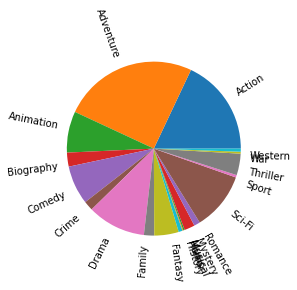

In [119]:
plt.pie(genre_budget.loc[:,'Budget'],labels=genre_budget.index,rotatelabels=True)
plt.show()